In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2


# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
import datetime
import pickle


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
from multiprocessing import cpu_count
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
# import ffn


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

RANDOM_STATE = 777

print()

Last updated: 2024-09-12T09:15:58.472669-04:00

Python implementation: CPython
Python version       : 3.8.19
IPython version      : 8.12.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit




/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_75202/2173331131.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
import os

# Run the setup script
%run ../../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import src.ch_02.code_ch_02 as f_ch2
import src.ch_03.code_ch_03 as f_ch3
import src.ch_04.code_ch_04 as f_ch4
import src.ch_05.code_ch_05 as f_ch5
import src.ch_06.code_ch_06 as f_ch6
import src.ch_07.code_ch_07 as f_ch7
import src.ch_08.code_ch_08 as f_ch8

Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config']
Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financ

---

## 16.4.1 Tree Clustering

[*********************100%%**********************]  10 of 10 completed
/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_75202/997907223.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, method='single')  # Linkage matrix


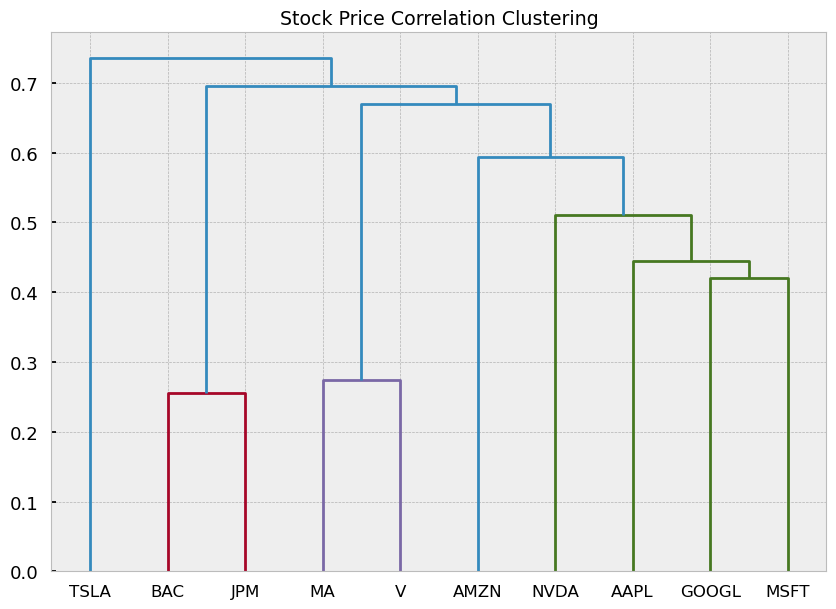

In [3]:
import yfinance as yf
import pandas as pd
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fetch stock price data using yfinance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'BAC', 'V', 'MA', 'NVDA']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()

# SNIPPET 16.1
# Step 3: Compute covariance and correlation matrices
cov = returns.cov()
corr = returns.corr()
# Step 4: Apply the clustering procedure
dist = ((1 - corr) / 2) ** 0.5  # Distance matrix
link = sch.linkage(dist, method='single')  # Linkage matrix

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(link, labels=returns.columns)
plt.title('Stock Price Correlation Clustering')
plt.show()


## 16.4.2 Quasi-Diagonalization

array([[ 2.        ,  4.        ,  0.25519105,  2.        ],
       [ 5.        ,  9.        ,  0.27418997,  2.        ],
       [ 3.        ,  6.        ,  0.41988319,  2.        ],
       [ 0.        , 12.        ,  0.44440991,  3.        ],
       [ 7.        , 13.        ,  0.51018124,  4.        ],
       [ 1.        , 14.        ,  0.59362473,  5.        ],
       [11.        , 15.        ,  0.66919508,  7.        ],
       [10.        , 16.        ,  0.69630314,  9.        ],
       [ 8.        , 17.        ,  0.73568597, 10.        ]])